In [6]:
from pynq import PL
import numpy as np
import time
import matplotlib.pyplot as plt
from pynq import allocate
from pynq import Overlay  #import the overlay module
%matplotlib notebook

In [7]:
PL.reset() #important fixes caching issues which have popped up.
ol = Overlay('./saved_design_1.bit')  #locate/point to the bit file
dma = ol.axi_dma_0 #might need to change name depending on what you called it

<IPython.core.display.Javascript object>


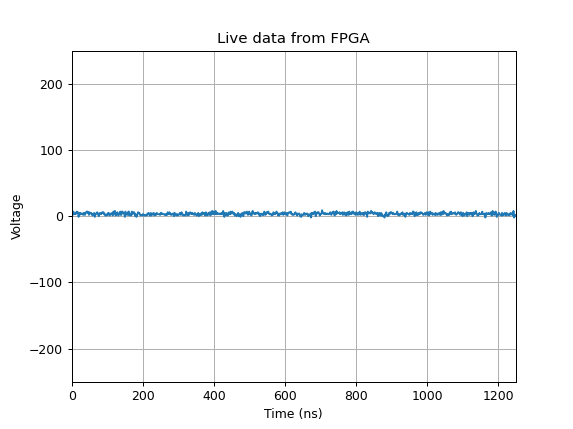

Loop runtime 8.385085105895996


In [8]:
n = 8192
sample_rate = 4.9152
out_buffer = allocate(n, dtype=np.int32)
x_data = [ix/sample_rate for ix in range(n)]

plt.ion()
fig, ax = plt.subplots()
line, = ax.plot(np.zeros(n))
line.set_xdata(x_data[::8])
ax.set_ylim(-250, 250)
ax.set_xlim(0, 1250)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Voltage')
ax.set_title('Live data from FPGA')
ax.grid(True)

loop_start = time.time()
for i in range(50):
    dma.recvchannel.transfer(out_buffer)
    start_time = time.time()
    dma.recvchannel.wait()
    end_time = time.time()
    line.set_ydata(out_buffer[::8])
    fig.canvas.draw()
    if end_time - start_time > 5:
        time.sleep(3)
print("Loop runtime", time.time() - loop_start)    
out_buffer.close()